# 1. Data

In [15]:
import glob
import numpy as np
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import norm
from scipy import stats
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler


Directories
    

In [18]:
segmentation_tables_path =  '../2_Image_Segmentation/datasets/output/merging_algorithm/merged/'

confusion_matrix_output_path = './figure_folder/' 
correlation_graph_output_path = './figure_folder/' 
feature_importance_output_path = './figure_folder/' 

Read segmentation tables and create data frames

In [19]:
path = segmentation_tables_path

# datasets
landslides_seg = {}
files = glob.glob('data*.csv')
for filename in os.listdir(path):  
     if filename.endswith('.csv'):
        frame = pd.read_csv(path+filename,index_col=False)
        frame.rename( columns={'Unnamed: 0':'segment'}, inplace=True)  
        landslides_seg[filename[0:13]] = frame   

Check dataframe

In [21]:
print(len(landslides_seg.keys()))
landslides_seg.keys()

74


dict_keys(['landslide_10_', 'landslide_67_', 'landslide_49_', 'landslide_18_', 'landslide_41_', 'landslide_36_', 'landslide_7_s', 'landslide_54_', 'landslide_23_', 'landslide_72_', 'landslide_24_', 'landslide_53_', 'landslide_31_', 'landslide_46_', 'landslide_68_', 'landslide_39_', 'landslide_60_', 'landslide_17_', 'landslide_65_', 'landslide_12_', 'landslide_1_s', 'landslide_34_', 'landslide_43_', 'landslide_21_', 'landslide_56_', 'landslide_70_', 'landslide_29_', 'landslide_59_', 'landslide_51_', 'landslide_26_', 'landslide_44_', 'landslide_33_', 'landslide_6_s', 'landslide_15_', 'landslide_62_', 'landslide_3_s', 'landslide_14_', 'landslide_63_', 'landslide_45_', 'landslide_32_', 'landslide_50_', 'landslide_27_', 'landslide_58_', 'landslide_71_', 'landslide_28_', 'landslide_20_', 'landslide_57_', 'landslide_35_', 'landslide_42_', 'landslide_64_', 'landslide_13_', 'landslide_8_s', 'landslide_4_s', 'landslide_38_', 'landslide_61_', 'landslide_16_', 'landslide_30_', 'landslide_47_', 'la

In [22]:
num = '51_'

# check data structure
landslides_seg[f'landslide_{num}'].head()

# check landslides = 1 / non_landslides segments =0
landslides_seg[f'landslide_{num}'].loc[landslides_seg[f'landslide_{num}']['class']==1] 

,segment,segment_id,class,area_m2,ratio_rg_change,ndvi,ndvi_change,brightness,brightness_change,gndvi,nd_std,slope_mean,slope_max,b3,b4,b2,b8,height_min,height_max
0,0,L51_S1124,1,9400.0,0.523979,0.551062,-0.003372,0.726660,0.011945,0.417827,0.050910,19.249744,34.654984,746.382979,527.446809,906.148936,1843.946809,273.0,318.0
1,1,L51_S1110,1,14000.0,0.494166,0.494987,0.063299,0.683407,0.051758,0.325914,0.061213,23.430350,34.654984,698.278571,463.364286,888.578571,1399.935714,266.0,364.0
2,2,L51_S1058,1,12000.0,0.538170,0.613304,-0.014494,0.765964,-0.021121,0.489543,0.069856,21.325917,33.543091,809.091667,564.850000,923.950000,2413.933333,250.0,323.0
3,3,L51_S1105,1,14900.0,0.503081,0.551810,0.011558,0.714483,0.026351,0.399558,0.063881,19.655011,31.289932,742.912752,498.798658,901.738255,1807.859060,267.0,350.0
4,4,L51_S995,1,19200.0,0.508917,0.617606,-0.022965,0.754905,-0.010582,0.484333,0.056810,22.359784,34.648529,798.781250,543.130208,922.802083,2383.281250,247.0,353.0


## 2. Data cleaning and  landslides features computation 


Eliminate outliers using z-score

In [23]:
for key in landslides_seg:
    cols = landslides_seg[key][['ndvi','slope_mean','brightness','ndvi_change','ratio_rg_change','ndvi_change']]
    z = np.abs(stats.zscore(cols))
    print ("Maximum Z:", z.max(), key ) # show that outlier have been detected
    landslides_seg[key] = landslides_seg[key][(z <5).all(axis=1)]# observation outside 5 standard deviations is considered as an outlier

Maximum Z: 3.9935889214487874 landslide_10_
Maximum Z: 2.5553139766214095 landslide_67_
Maximum Z: 3.865774721329768 landslide_49_
Maximum Z: 3.331033245244133 landslide_18_
Maximum Z: 3.490773093944795 landslide_41_
Maximum Z: 3.006344867668193 landslide_36_
Maximum Z: 3.789190045545797 landslide_7_s
Maximum Z: 2.864239788000021 landslide_54_
Maximum Z: 3.301702125916707 landslide_23_
Maximum Z: 4.547804993517196 landslide_72_
Maximum Z: 3.331033245244133 landslide_24_
Maximum Z: 3.154554210399545 landslide_53_
Maximum Z: 4.329126674926701 landslide_31_
Maximum Z: 3.05849761340794 landslide_46_
Maximum Z: 5.171404952341849 landslide_68_
Maximum Z: 3.7670307638714653 landslide_39_
Maximum Z: 2.218988549756878 landslide_60_
Maximum Z: 4.04431755824181 landslide_17_
Maximum Z: 4.333494988112476 landslide_65_
Maximum Z: 3.789600321054933 landslide_12_
Maximum Z: 3.625113647511624 landslide_1_s
Maximum Z: 3.706974042270806 landslide_34_
Maximum Z: 3.1377121221457402 landslide_43_
Maximum Z

Calculate contextual features: landslide diagnostic features relative to the information contained in the image. It is calculated as the difference between the segment (feature value) and the weighted mean of the image.

In [24]:
def neighbours_relationship(df_train,feature,area):
    for key in df_train:
        #calculate the weighted mean per feature
        weighted_mean = (df_train[key][feature] * df_train[key][area]).sum() /(df_train[key][area].sum())
        mean_all_segments = df_train[key][feature].mean()
        feature_subtraction_weighted = []        

        for i in range (len(df_train[key])):
            # Subtract the mean from each observation and squared it
              mean_weighted_subtraction = (df_train[key][feature].iloc[i] - weighted_mean) 
              mean_subtraction  =  (df_train[key][feature].iloc[i] - mean_all_segments) 
              new_name_feature = feature[0:]+'_var'
              new_name_feature_weighted = feature[0:]+'_deviation'    
              feature_subtraction_weighted.append (mean_weighted_subtraction)

        # Create a new column with the calculated contextual feature
        df_train[key][new_name_feature_weighted] = feature_subtraction_weighted   
     

neighbours_relationship(landslides_seg,'ndvi','area_m2')             
neighbours_relationship(landslides_seg,'ratio_rg_change','area_m2')
neighbours_relationship(landslides_seg,'brightness','area_m2')
neighbours_relationship(landslides_seg,'gndvi','area_m2')
neighbours_relationship(landslides_seg,'ndvi_change','area_m2')
neighbours_relationship(landslides_seg,'brightness_change','area_m2')
neighbours_relationship(landslides_seg,'nd_std','area_m2')

Calculate relative relieve: difference between the highest and lowest points in elevation within the segments

In [25]:
def relative_relief (df_train,height_min, height_max):
    
     for key in df_train:
            relative_relief_list = []  
            
            for i in range (len(df_train[key])):
                relative_relief = (df_train[key][height_max].iloc[i] - df_train[key][height_min].iloc[i] )
                relative_relief_list.append (relative_relief)
                
            df_train[key]['relative_relief'] = relative_relief_list  

relative_relief (landslides_seg, 'height_min', 'height_max')

Create a unique dataset with all segmented tables

In [30]:
df_keys = pd.concat(landslides_seg, ignore_index=True)
df_keys.to_csv('./segments_df.csv', index=False)

In [31]:
# Count the number of landslides segments
df_keys.loc[df_keys.loc[:,'class']==1,:].count() 

segment                        257
segment_id                     257
class                          257
area_m2                        257
ratio_rg_change                257
ndvi                           257
ndvi_change                    257
brightness                     257
brightness_change              257
gndvi                          257
nd_std                         257
slope_mean                     257
slope_max                      257
b3                             257
b4                             257
b2                             257
b8                             257
height_min                     257
height_max                     257
ndvi_deviation                 257
ratio_rg_change_deviation      257
brightness_deviation           257
gndvi_deviation                257
ndvi_change_deviation          257
brightness_change_deviation    257
nd_std_deviation               257
relative_relief                257
dtype: int64

In [32]:
# Count the number of non-landslides segments
df_keys.loc[df_keys.loc[:,'class']==0,:].count() 

segment                        3387
segment_id                     3387
class                          3387
area_m2                        3387
ratio_rg_change                3387
ndvi                           3387
ndvi_change                    3387
brightness                     3387
brightness_change              3387
gndvi                          3387
nd_std                         3387
slope_mean                     3387
slope_max                      3387
b3                             3387
b4                             3387
b2                             3387
b8                             3387
height_min                     3387
height_max                     3387
ndvi_deviation                 3387
ratio_rg_change_deviation      3387
brightness_deviation           3387
gndvi_deviation                3387
ndvi_change_deviation          3387
brightness_change_deviation    3387
nd_std_deviation               3387
relative_relief                3387
dtype: int64

## 3. Data visualization

### Data Normalization 

In [375]:
#create a new df to normalize the features values
df_norm_data = df_keys.copy()
df_norm_data.columns

Index(['segment', 'segment_id', 'class', 'area_m2', 'ratio_rg_change', 'ndvi',
       'ndvi_change', 'brightness', 'brightness_change', 'gndvi', 'nd_std',
       'slope_mean', 'slope_max', 'b3', 'b4', 'b2', 'b8', 'height_min',
       'height_max', 'ndvi_deviation', 'ratio_rg_change_deviation',
       'brightness_deviation', 'gndvi_deviation', 'ndvi_change_deviation',
       'brightness_change_deviation', 'nd_std_deviation', 'relative_relief'],
      dtype='object')

In [376]:
feature_normalization=[]
# df_keys.columns
feature_normalization.append((df_norm_data.columns[2], df_norm_data.columns[3], df_norm_data.columns[4],  
                              df_norm_data.columns[5], df_norm_data.columns[6],df_norm_data.columns[7],
                              df_norm_data.columns[10],df_norm_data.columns[11],df_norm_data.columns[12],
                              df_norm_data.columns[13], df_norm_data.columns[14], df_norm_data.columns[15],  
                              df_norm_data.columns[16], df_norm_data.columns[17],df_norm_data.columns[18],
                              df_norm_data.columns[19],df_norm_data.columns[20],df_norm_data.columns[21],
                              df_norm_data.columns[22],df_norm_data.columns[23], df_norm_data.columns[24],
                              df_norm_data.columns[25], df_norm_data.columns[26]))
                             
feature_normalization= feature_normalization[0]


In [377]:
def normalization(feature,norm_data):
    min_val = norm_data[feature].min() # record scaling minimum
    max_val = norm_data[feature].max() # record scaling maximum
    norm_data[feature] = (norm_data[feature] - min_val) / (max_val - min_val)
for i in range (len(feature_normalization)):
    normalization(feature_normalization[i],df_norm_data)

 ### Data Correlation

KeyboardInterrupt: 

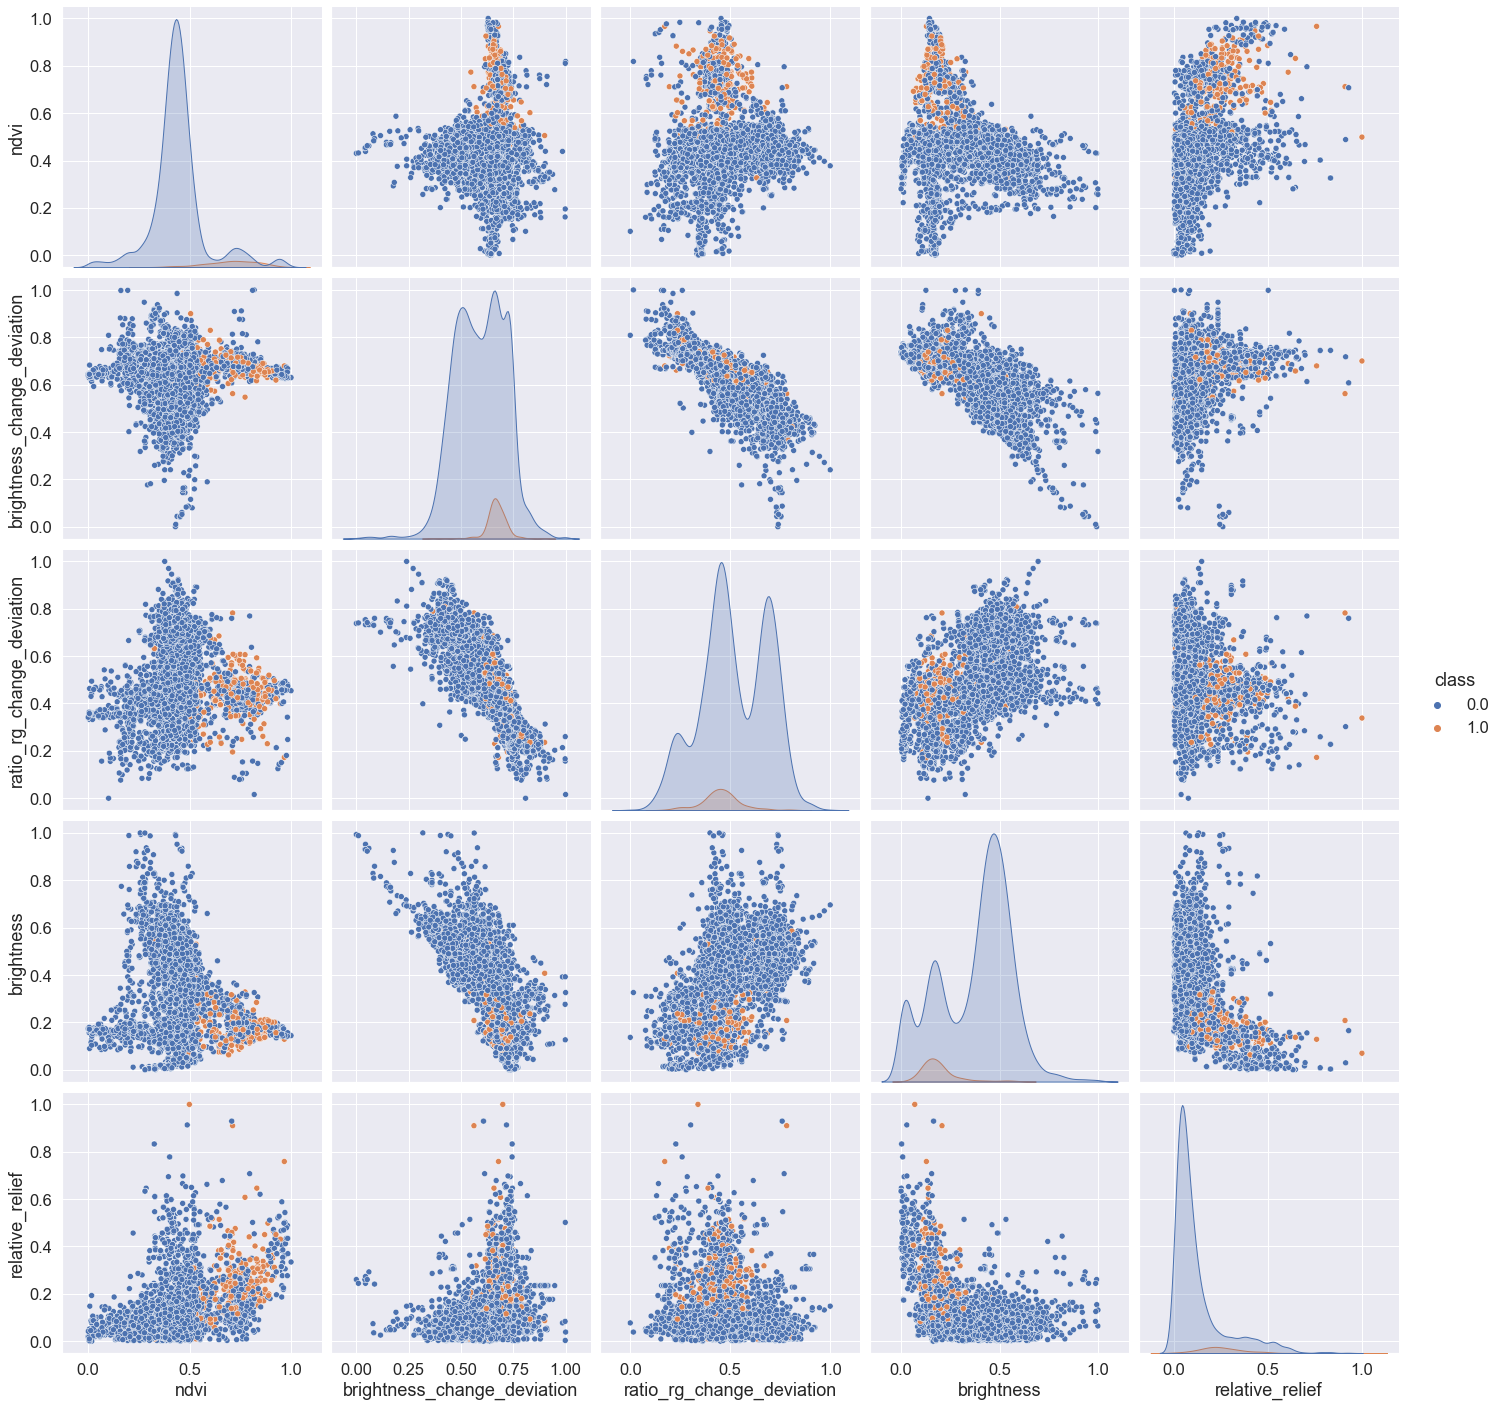

In [378]:
sns.set(font_scale=1.5)
sns_plot = sns.pairplot(df_norm_data ,hue='class', palette='deep', vars=['ndvi', 'brightness_change_deviation','ratio_rg_change_deviation','brightness','relative_relief'],height = 4) #"b4", "b3", "b2",
sns_plot.savefig(correlation_graph_output_path)
